In [14]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.9.1
2.9.0


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [16]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/tmp/ipykernel_4665/2985883500.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.data', sep=", ",header = None)
/tmp/ipykernel_4665/2985883500.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [17]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [18]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4200      
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

# Zad
nauczmy model z EarlyStopping

Musimy podać:
* miarę, która ma zostać użyta do zatrzymania modelu
* jak długo ma model ma czekać na otrzymanie lepszego parametru zanim się zatrzyma


In [20]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[early_stopping])

Epoch 1/100
943/943 [==============================] - 5s 4ms/step - loss: 0.4303 - accuracy: 0.7902 - val_loss: 0.3761 - val_accuracy: 0.8165
Epoch 2/100
943/943 [==============================] - 4s 4ms/step - loss: 0.3782 - accuracy: 0.8123 - val_loss: 0.3707 - val_accuracy: 0.8117
Epoch 3/100
943/943 [==============================] - 3s 4ms/step - loss: 0.3741 - accuracy: 0.8130 - val_loss: 0.3740 - val_accuracy: 0.8171
Epoch 4/100
943/943 [==============================] - 4s 4ms/step - loss: 0.3710 - accuracy: 0.8154 - val_loss: 0.3624 - val_accuracy: 0.8224
Epoch 5/100
943/943 [==============================] - 4s 4ms/step - loss: 0.3689 - accuracy: 0.8165 - val_loss: 0.3733 - val_accuracy: 0.8078
Epoch 6/100
943/943 [==============================] - 3s 4ms/step - loss: 0.3698 - accuracy: 0.8129 - val_loss: 0.3719 - val_accuracy: 0.8163
Epoch 7/100
943/943 [==============================] - 4s 4ms/step - loss: 0.3679 - accuracy: 0.8141 - val_loss: 0.3734 - val_accuracy: 0.8066

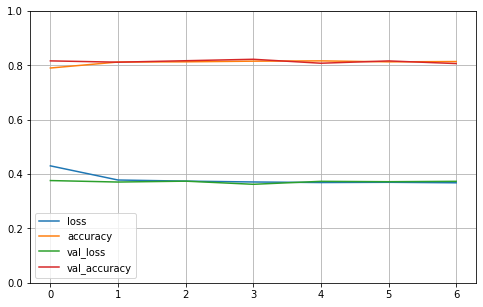

In [21]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [22]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 1s 2ms/step - loss: 0.3734 - accuracy: 0.8066


[0.37336787581443787, 0.8065736889839172]

In [23]:
from sklearn import  metrics
# metrics.accuracy_score(y_true= y_test, y_pred= model.predict_classes(X_test) )

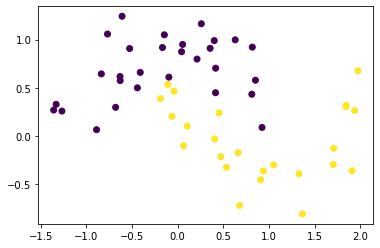

In [24]:
from sklearn.datasets import make_moons
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=5)
# split into train and test
# n_train = 30
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=2)

n_train=53
X_train, X_test = X[:n_train, :], X[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plt.show()

In [25]:
history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               300       
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dense_10 (Dense)            (None, 10)                510       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,871
Trainable params: 5,871
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=1000)

Epoch 1/1000
2/2 [==============================] - 1s 180ms/step - loss: 0.7216 - accuracy: 0.5472 - val_loss: 0.7795 - val_accuracy: 0.4468
Epoch 2/1000
2/2 [==============================] - 0s 36ms/step - loss: 0.7105 - accuracy: 0.5472 - val_loss: 0.7627 - val_accuracy: 0.4468
Epoch 3/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.7037 - accuracy: 0.5472 - val_loss: 0.7485 - val_accuracy: 0.4468
Epoch 4/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.6956 - accuracy: 0.5472 - val_loss: 0.7375 - val_accuracy: 0.4468
Epoch 5/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.6937 - accuracy: 0.5472 - val_loss: 0.7283 - val_accuracy: 0.4468
Epoch 6/1000
2/2 [==============================] - 0s 37ms/step - loss: 0.6893 - accuracy: 0.5472 - val_loss: 0.7215 - val_accuracy: 0.4468
Epoch 7/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.6878 - accuracy: 0.5472 - val_loss: 0.7160 - val_accuracy: 0.4468
Epoch 8/1000

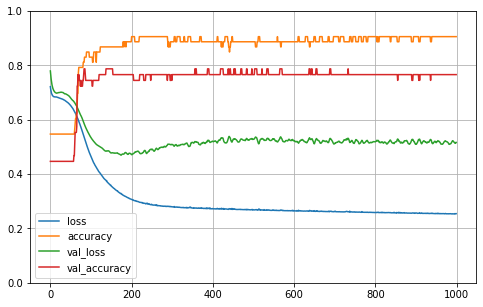

3888/3888 [==============================] - 5s 1ms/step


<AxesSubplot:>

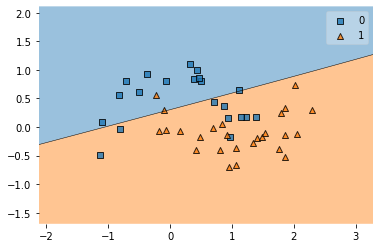

In [27]:
from mlxtend.plotting import plot_decision_regions
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

plot_decision_regions(X_test,y_test,model)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               300       
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 10)                510       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,871
Trainable params: 5,871
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 1s 153ms/step - loss: 0.8114 - accuracy: 0.4528 - val_loss: 0.7194 - val_accuracy: 0.5532
Epoch 2/1000
2/2 [========================

/home/hania/PycharmProjects/PSI_12/venv/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


<AxesSubplot:>

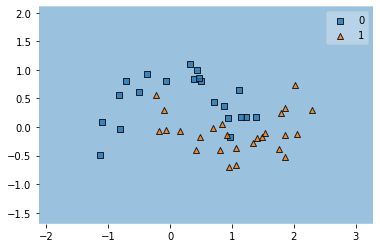

In [28]:
history = History()
model1 = Sequential()
model1.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model1.add(Dense(50,activation="sigmoid"))
model1.add(Dense(10,activation="sigmoid"))
model1.add(Dense(1,activation="sigmoid"))
model1.summary()

model1.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
history = model1.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=1000, callbacks=[early_stopping])
plot_decision_regions(X_test,y_test,model1)

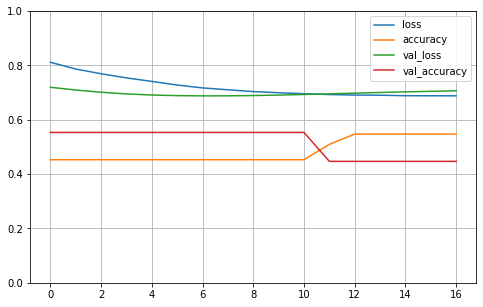

In [29]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

